<a href="https://colab.research.google.com/github/sid-vt/DL-Research/blob/trial/2DCNNv3_AN_Hole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

from PIL import Image
import cv2

import random
import math

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import activations
from tensorflow.keras import layers

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

pd.options.display.max_rows = 3000

# import h5py
# import torchvision

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# top left corner +1 and bottom corner as it is 
# img_read[y1+1:y2, x1:x2]

image = []
for image_path in glob.glob('/content/drive/MyDrive/Colab Notebooks/ResearchCNN/100_Holes/*.png'):
    img_read = cv2.imread(image_path)
    crop_img = img_read[76:153, 75:152]
    resize = cv2.resize(crop_img, (32, 32))
    image.append(resize)
    imag/*
image = np.asarray(image)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


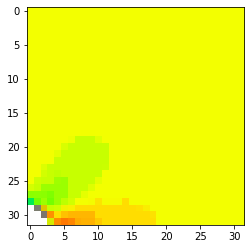

In [4]:
data = image[78]
img_show = Image.fromarray(image[15], 'RGB')
plt.imshow(data, interpolation='nearest')
plt.show()

In [5]:
X = image

In [6]:
X = np.delete(X,76,axis=0)

In [7]:
x = (X - X.min())/(X.max() - X.min())
x[10]

ValueError: ignored

In [ ]:
x.shape

In [ ]:
X_single = X.mean(axis=3).mean(axis=2).mean(axis=1)
X_single

In [ ]:
# Scaling with min max
Xnorm = (X_single - X_single.min())/(X_single.max() - X_single.min())
Xnorm

In [ ]:
y = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ResearchCNN/100_Holes/results.txt')
y = np.delete(y,76)
ynorm = (y - y.min())/(y.max() - y.min())
ynorm

In [ ]:
plt.scatter(Xnorm, ynorm)

In [ ]:
# x = np.random.normal(size = 1000)
plt.hist(y, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
(unique, counts) = np.unique(Xnorm, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

In [ ]:
np.where(Xnorm.round(7) == round(5.60206489e-03,7))

In [ ]:
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
counts

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, ynorm , test_size=0.1)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

AlexNet.add(Dense(1))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('linear'))

#Model Summary
AlexNet.summary()

In [ ]:
# Compile the model
# Compiling the model
AlexNet.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer= 'adam', metrics=['accuracy'])

# Fit data to model
history = AlexNet.fit(X_train ,y_train, validation_data=(X_test,y_test),
            batch_size=20,
            epochs=500,
            verbose=1)

In [ ]:
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions_all = model.predict(x)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [ ]:
xlim = 1
x = np.linspace(0,xlim,100)
plt.plot(x, x)

# x = np.linspace(1,1,10)
plt.scatter(predictions_all,ynorm)
# plt.plot(x,x)

In [ ]:
import seaborn as snsn

In [ ]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(predictions_test.ravel(),label="",ax=ax,c='b')
sns.kdeplot(y_test.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')

fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(predictions_train.ravel(),label="",ax=ax,c='b')
sns.kdeplot(y_train.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')


In [ ]:
sns.kdeplot(y,label="",ax=ax,c='b')

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
sns.kdeplot(y.ravel(),label="",ax=ax,c='b')
# sns.kdeplot(y_test.ravel(),label="",ax=ax,c='g')
ax.legend(['Actual','Pred'],fontsize=14)
ax.title.set_text('Test_set')